Implement a 2-opt heuristic for the TSP.
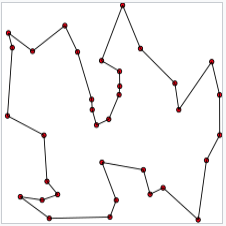

In [1]:
import networkx as nx

n = 20                     # number of cities
G = nx.complete_graph(20)  # graph with a vertex for each city

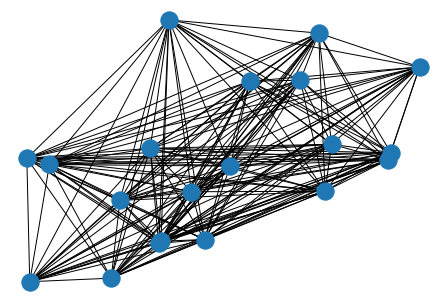

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [3]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

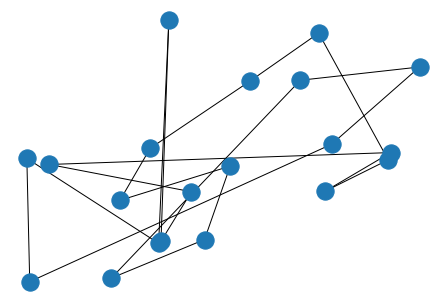

In [4]:
# Pick an arbitrary tour, in this case (0,1,2,...,n-1)
tour = list(G.nodes)
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

swapping edges (0, 1) (2, 3) with (0, 2) (1, 3)
swapping edges (0, 2) (7, 8) with (0, 7) (2, 8)
swapping edges (0, 7) (8, 9) with (0, 8) (7, 9)
swapping edges (8, 2) (4, 5) with (8, 4) (2, 5)
swapping edges (4, 3) (17, 18) with (4, 17) (3, 18)
swapping edges (4, 17) (18, 19) with (4, 18) (17, 19)
swapping edges (3, 1) (2, 5) with (3, 2) (1, 5)
swapping edges (3, 2) (7, 9) with (3, 7) (2, 9)
swapping edges (3, 7) (9, 10) with (3, 9) (7, 10)
swapping edges (3, 9) (10, 11) with (3, 10) (9, 11)
swapping edges (3, 10) (11, 12) with (3, 11) (10, 12)
swapping edges (11, 9) (2, 1) with (11, 2) (9, 1)
swapping edges (11, 2) (19, 0) with (11, 19) (2, 0)
swapping edges (19, 17) (16, 15) with (19, 16) (17, 15)
swapping edges (19, 16) (12, 10) with (19, 12) (16, 10)
swapping edges (19, 12) (1, 9) with (19, 1) (12, 9)
swapping edges (1, 5) (6, 7) with (1, 6) (5, 7)
swapping edges (1, 6) (7, 10) with (1, 7) (6, 10)
swapping edges (1, 7) (14, 13) with (1, 14) (7, 13)
swapping edges (14, 15) (17, 16) w

C:\Users\buchanan\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


swapping edges (10, 5) (16, 15) with (10, 16) (5, 15)
swapping edges (12, 18) (3, 11) with (12, 3) (18, 11)
swapping edges (12, 3) (11, 4) with (12, 11) (3, 4)


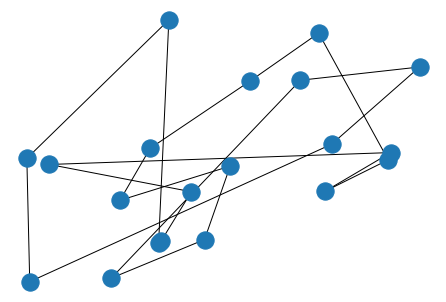

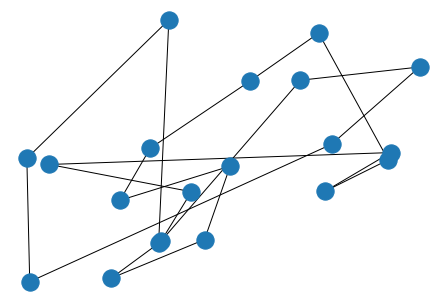

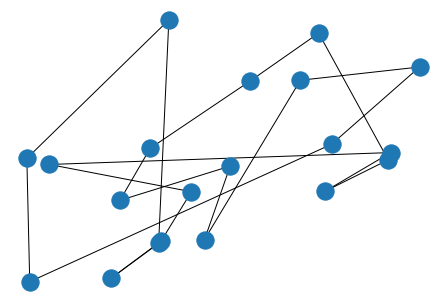

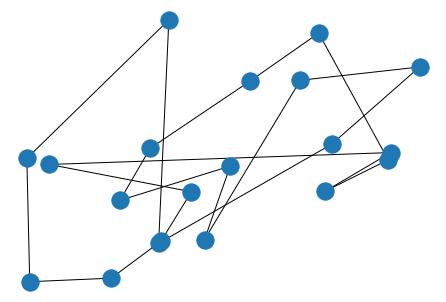

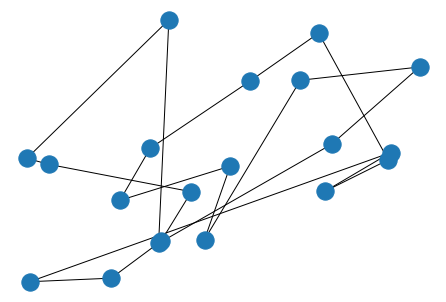

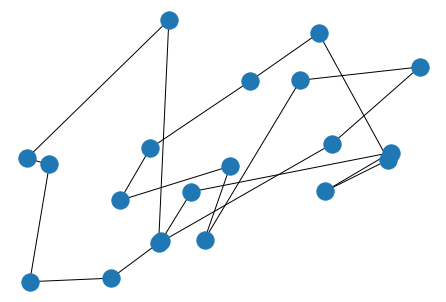

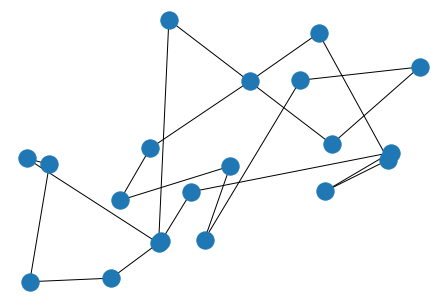

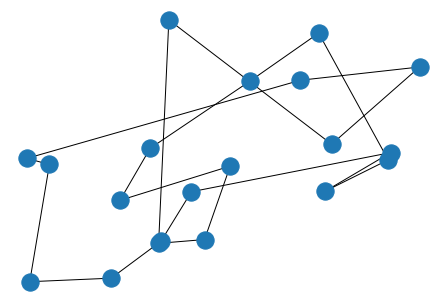

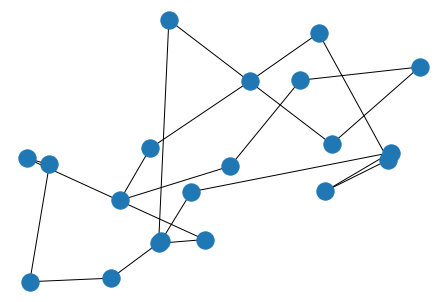

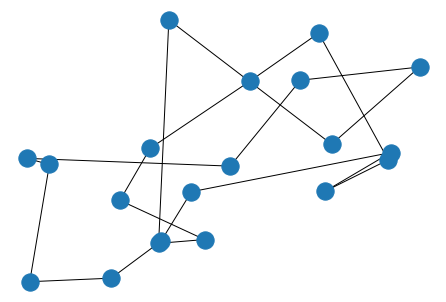

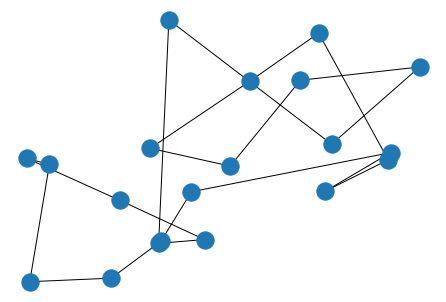

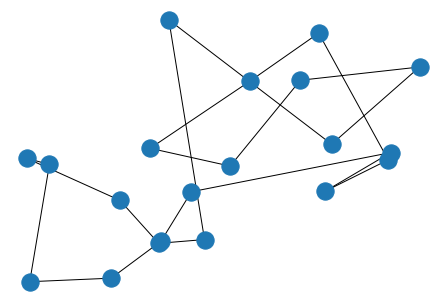

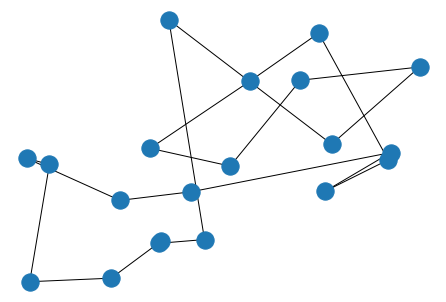

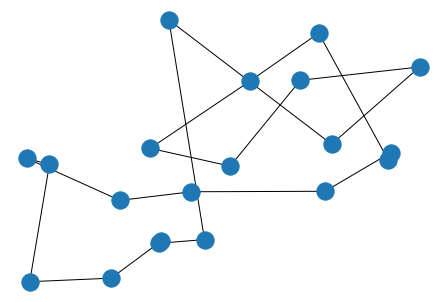

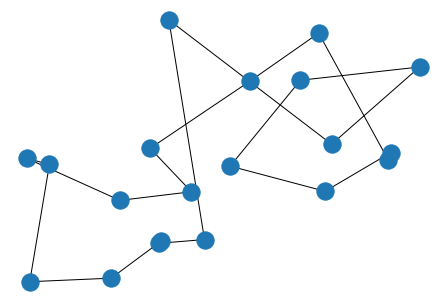

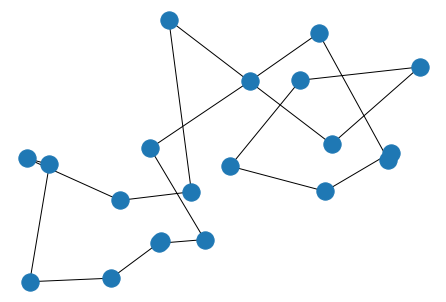

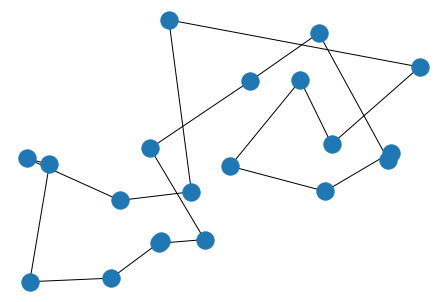

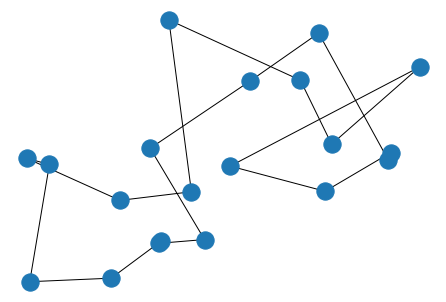

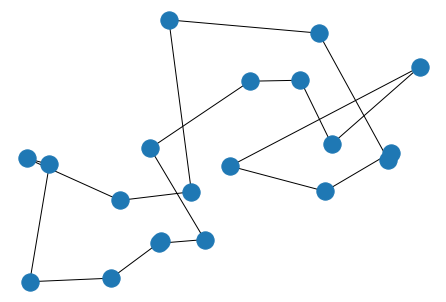

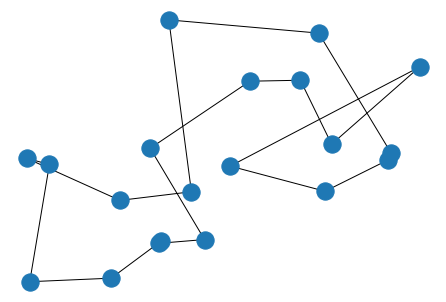

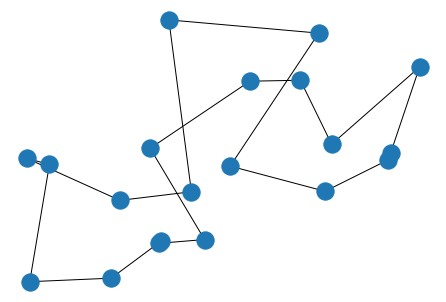

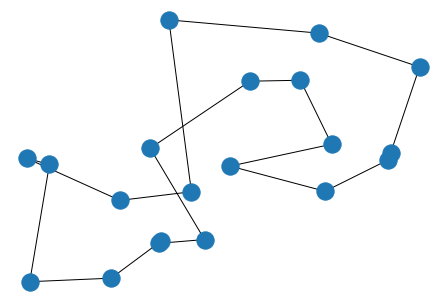

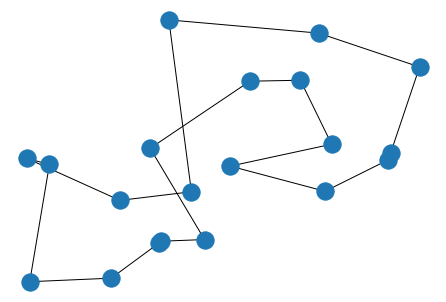

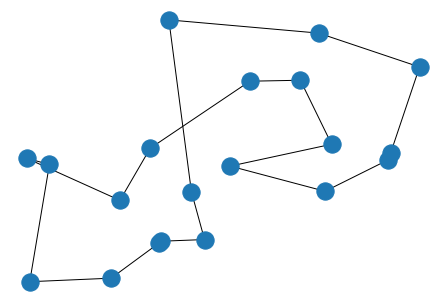

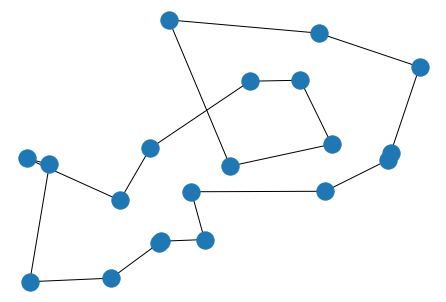

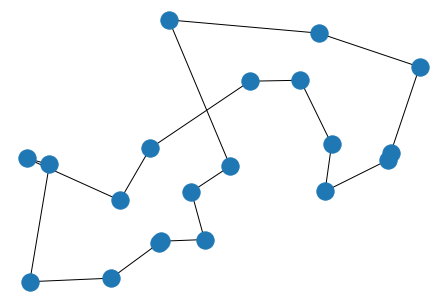

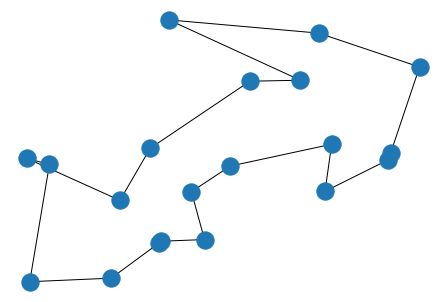

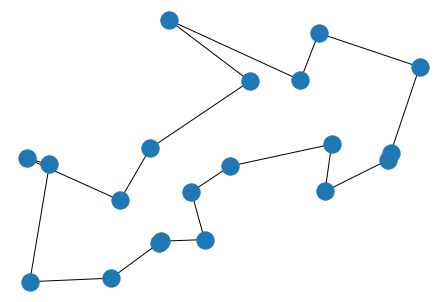

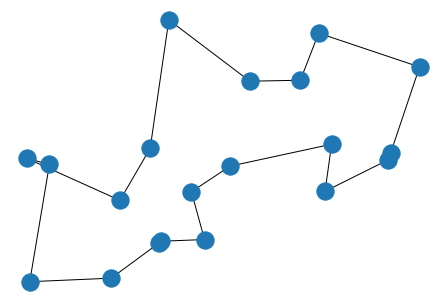

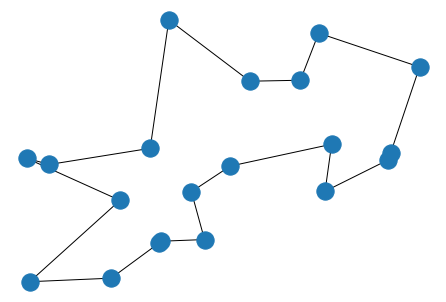

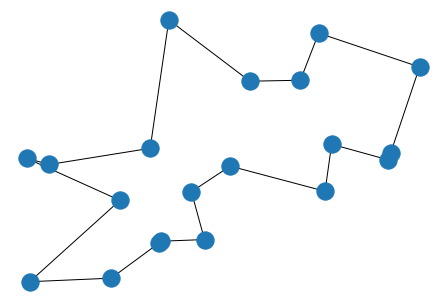

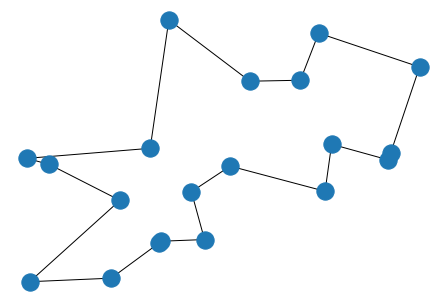

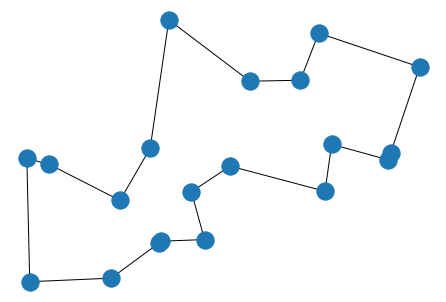

In [5]:
import matplotlib.pyplot as plt

improved = True
while improved:
    improved = False
    for i in range(n):
        for j in range(i+1,n):
            
            # two current edges from tour
            cur1 = (tour[i],tour[i+1])
            cur2 = (tour[j],tour[(j+1)%n])
            cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']
            
            # two 'new' edges for the tour
            new1 = (tour[i],tour[j])
            new2 = (tour[i+1],tour[(j+1)%n])
            new_length = G.edges[new1]['length'] + G.edges[new2]['length']
            
            # update the tour, if improved
            if new_length < cur_length:
                print("swapping edges",cur1,cur2,"with",new1,new2)
                tour[i+1:j+1] = tour[i+1:j+1][::-1]
                improved = True
                
                # draw the new tour
                tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
                plt.figure() # call this to create a new figure, instead of drawing over the previous one(s)
                nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)
                


Final tour: [0, 9, 19, 10, 16, 5, 15, 17, 6, 14, 7, 13, 1, 12, 11, 18, 3, 4, 8, 2]


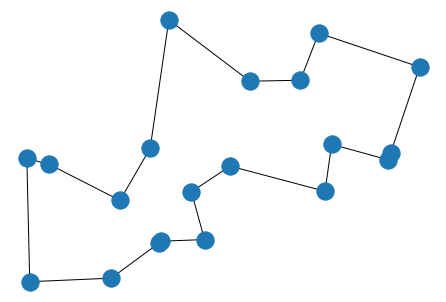

In [6]:
print("Final tour:",tour)
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)